# 1. RNN(Simple)

In [1]:
import tensorflow as tf
tf.__version__

'1.13.1'

In [26]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, TimeDistributed, Activation, LSTM, SimpleRNN # TimeDistributed: 시차마다 분석하는 모듈
from keras.utils import np_utils # 넘파이 안의 util 호출:  util엔 to_categorical이 포함되어 있음
import os

In [8]:
# 학습 중간 결과를 시각화하는 모듈
from keras.utils.vis_utils import plot_model

In [33]:
# 샘플 데이터
sample = "hihello"

char_set = list(set(sample)) # 샘플의 각 문자를 집합으로 하여 중복을 없애고 다시 리스트로 변환
char_dic= {w:i for i,w in enumerate(char_set)} # 각 '단어:인덱스'를 아이템으로 하여 단어 사전 생성

print("sample: {0}\nchar_set: {1}\nchar_dic: {2}".format(sample,char_set,char_dic))

sample: hihello
char_set: ['i', 'l', 'e', 'h', 'o']
char_dic: {'i': 0, 'l': 1, 'e': 2, 'h': 3, 'o': 4}


In [34]:
x_str = sample[:-1] # 입력용 데이터: 마지막 예측할 문자를 제외한 앞쪽의 문자 
y_str = sample[1:]  # 출력용 데이터: 입력된 첫 문자를 제외한 뒤쪽의 문자

data_dim = len(char_set) # 데이터 길이 (특성의 수)
timesteps = len(y_str)  # 참조할 과거 데이터 횟수
num_classes = len(char_set) # 원핫의 길이

In [56]:
x = [char_dic[c] for c in x_str] # x = 단어사전에서 각 문자에 할당한 숫자 리스트
y = [char_dic[c] for c in y_str] # y = 단어사전에서 각 문자에 할당한 숫자 리스트
print("{0}\n{1}".format(x,y))

[3, 0, 3, 2, 1, 1]
[0, 3, 2, 1, 1, 4]


In [57]:
# 원핫인코딩
x = np_utils.to_categorical(x, num_classes=num_classes)
print(x.shape)
print(x)
x = np.reshape(x, (-1, len(x), data_dim)) # 과거 데이터는 모두 읽을 것이므로 -1이라고 표기
print(x.shape)
print(x)
# 원핫인코딩
y = np_utils.to_categorical(y, num_classes=num_classes)
print(y.shape)
print(y)
# time steps
y = np.reshape(y, (-1, len(y), data_dim))
print(y.shape)
print(y)

(6, 5)
[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
(1, 6, 5)
[[[0. 0. 0. 1. 0.]
  [1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0.]]]
(6, 5)
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
(1, 6, 5)
[[[1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]]]


In [93]:
# 모델 생성
model = Sequential()
model.add(SimpleRNN(num_classes, # num_classes는 노드 수, input_shape= (반영할 과거 시간 개수, 특성 수)
                    input_shape=(timesteps, data_dim), # 현재 x가 1개이므로 생략했음 원래 (x, time, dim)
                    return_sequences=True)) 
# 일반층에 맞게 분포를 떨어뜨림..                                            
model.add(TimeDistributed(Dense(num_classes))) # output 수 = 원핫의 길이 = 노드의 수
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_22 (SimpleRNN)    (None, 6, 5)              55        
_________________________________________________________________
time_distributed_4 (TimeDist (None, 6, 5)              30        
_________________________________________________________________
activation_13 (Activation)   (None, 6, 5)              0         
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [94]:
#plot_model(model, to_file=os.path.basename(__file__) + '.png') 
# 컴파일, 학습
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['acc'])
model.fit(x,y, epochs=5, batch_size=1)


Epoch 1/5
1/1 [==============================] - 1s 837ms/step - loss: 1.7286 - acc: 0.3333
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 1.7239 - acc: 0.3333
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 1.7192 - acc: 0.3333
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 1.7145 - acc: 0.3333
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 1.7098 - acc: 0.3333


In [95]:
predictions = model.predict(x, verbose=0)

In [96]:
# 숫자를 문자로 변환
for i, prediction in enumerate(predictions):
    print(prediction)
    x_index = np.argmax(x[i], axis=1)
    x_str = [char_set[j] for j in x_index]
    print(x_index, ''.join(x_str))
    
    index = np.argmax(prediction, axis=1)
    result = [char_set[j] for j in index]
    print(index, ''.join(result))

[[0.24524549 0.18839297 0.19700798 0.19816864 0.17118496]
 [0.27318648 0.22379799 0.23586352 0.11054733 0.1566047 ]
 [0.26826873 0.26380405 0.18176635 0.14177929 0.1443816 ]
 [0.22389272 0.2499592  0.16999158 0.16964683 0.18650971]
 [0.2500697  0.23172656 0.26960388 0.10437518 0.1442247 ]
 [0.14063257 0.44382733 0.15114875 0.13815701 0.12623431]]
[3 0 3 2 1 1] hihell
[0 0 0 1 2 1] iiilel


# 2. 주식 데이터 RNN 적용
1. 나중 데이터가 먼저 오도록 정렬(sort)

2. 설계: 아웃풋은 마지막에만 나오는 모델(timesteps=7, 특성=5, 인풋shape=7x5),
   아웃풋은 (nx1) 형태
3. 단위 표준화
4. reshape 
5. 훈련셋: 과거 2년은 훈련용, 최근 자료는 테스트용
6. 아웃풋은 표준화된 데이터를 다시 원래 단위로 보여줘야 함.
7. rmse 등으로 모델 평가
8. 시각화로 흐름 파악

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
tf.set_random_seed(777)
import matplotlib.pyplot as plt

In [2]:
# Define train parameters 
seq_length = 7 # 매번 7개의 과거 정보만 활용할 것임
data_dim = 5 # 특성 5개
hidden_dim = 10 # 노드의 개수
output_dim = 1 # 결과는 마지막에 하나만 나옴
learning_rate =0.01
iterations = 100 # 에폭 횟수

xy1 = np.loadtxt('../data-02-stock_daily.csv', delimiter=',') # 넘파이 구조로 불러오기

# 단계 1: 정렬
xy1 = xy1[::-1] # 1차원 표기법: 행 단위로 읽겠다는 것. [시작:끝:-1은 역순]

# 단계 3: 정규화
min1 = np.min(xy1, 0) # 각 열마다 최소값 
max1 = np.max(xy1, 0) # 각 열마다 최대값 
xy = (xy1-min1)/(max1-min1) # 정규화: (X-min) / (max - min)

xy[1]


array([0.19393503, 0.20364193, 0.20866457, 0.00298467, 0.19655155])

In [3]:
x=xy
# x,y 분리
y0 = xy[:,-1] # 한 열에 모든 데이터 행
y = xy[:, [-1]] # 열방향으로 전환 # close as label
dataX=[]
dataY=[]
for i in range(0, len(y)-seq_length): # i번째 시계열 값~i-7까지
    _x = x[i:i + seq_length] # 7개 행을 불러옴
    _y = y[i + seq_length] # 다음 종가(7일 후 값) 하나만 가져옴
    print(_x, "->",_y)
    dataX.append(_x)
    dataY.append(_y)
dataX[0]

[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142111e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967474e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]] -> [0.13289962]
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142111e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967474e-01]
 [2.33129931e-01 2.3641

 [0.10948375 0.12265225 0.1232738  0.11799767 0.12886303]] -> [0.12960614]
[[0.1700392  0.17141362 0.17773601 0.16935556 0.16259804]
 [0.16601771 0.16618193 0.17785346 0.11469033 0.17335234]
 [0.16129672 0.16976613 0.17359855 0.14162409 0.161607  ]
 [0.15721709 0.15944728 0.15241236 0.17523528 0.1457523 ]
 [0.13463251 0.12970479 0.13582409 0.1531236  0.12526364]
 [0.10948375 0.12265225 0.1232738  0.11799767 0.12886303]
 [0.12656046 0.13502316 0.14214199 0.11606167 0.12960614]] -> [0.14298359]
[[0.16601771 0.16618193 0.17785346 0.11469033 0.17335234]
 [0.16129672 0.16976613 0.17359855 0.14162409 0.161607  ]
 [0.15721709 0.15944728 0.15241236 0.17523528 0.1457523 ]
 [0.13463251 0.12970479 0.13582409 0.1531236  0.12526364]
 [0.10948375 0.12265225 0.1232738  0.11799767 0.12886303]
 [0.12656046 0.13502316 0.14214199 0.11606167 0.12960614]
 [0.12743474 0.13837616 0.14912581 0.10492068 0.14298359]] -> [0.14056467]
[[0.16129672 0.16976613 0.17359855 0.14162409 0.161607  ]
 [0.15721709 0.159447

 [0.72039096 0.71110357 0.71677399 0.26645156 0.71417973]] -> [0.72726576]
[[0.65668852 0.66751615 0.67362392 0.17593439 0.68276203]
 [0.67653362 0.69231591 0.69717237 0.15330286 0.69345802]
 [0.67685412 0.68303764 0.6960573  0.15354486 0.68716288]
 [0.6752514  0.69800993 0.69529433 0.14488662 0.70977905]
 [0.70462569 0.71419633 0.7290103  0.16607511 0.71470448]
 [0.72039096 0.71110357 0.71677399 0.26645156 0.71417973]
 [0.70477136 0.71254878 0.72172128 0.1638971  0.72726576]] -> [0.72336032]
[[0.67653362 0.69231591 0.69717237 0.15330286 0.69345802]
 [0.67685412 0.68303764 0.6960573  0.15354486 0.68716288]
 [0.6752514  0.69800993 0.69529433 0.14488662 0.70977905]
 [0.70462569 0.71419633 0.7290103  0.16607511 0.71470448]
 [0.72039096 0.71110357 0.71677399 0.26645156 0.71417973]
 [0.70477136 0.71254878 0.72172128 0.1638971  0.72726576]
 [0.70756897 0.7197748  0.73329456 0.11309492 0.72336032]] -> [0.71552044]
[[0.67685412 0.68303764 0.6960573  0.15354486 0.68716288]
 [0.6752514  0.698009

[[0.90144472 0.9090966  0.92203374 0.11000269 0.91635521]
 [0.91021623 0.91296982 0.92617114 0.10284127 0.92046468]
 [0.91753068 0.90955899 0.93013248 0.08799857 0.92390372]
 [0.92391259 0.92282604 0.94550876 0.10049296 0.93588207]
 [0.93644323 0.93932734 0.96226395 0.10667742 0.95211558]
 [0.94518557 0.94522671 0.96376051 0.09372591 0.95564213]
 [0.9462346  0.94522671 0.97100833 0.11616922 0.9513578 ]] -> [0.96645463]
[[0.91021623 0.91296982 0.92617114 0.10284127 0.92046468]
 [0.91753068 0.90955899 0.93013248 0.08799857 0.92390372]
 [0.92391259 0.92282604 0.94550876 0.10049296 0.93588207]
 [0.93644323 0.93932734 0.96226395 0.10667742 0.95211558]
 [0.94518557 0.94522671 0.96376051 0.09372591 0.95564213]
 [0.9462346  0.94522671 0.97100833 0.11616922 0.9513578 ]
 [0.94789567 0.94927335 0.97250489 0.11417048 0.96645463]] -> [0.97785024]
[[0.91753068 0.90955899 0.93013248 0.08799857 0.92390372]
 [0.92391259 0.92282604 0.94550876 0.10049296 0.93588207]
 [0.93644323 0.93932734 0.96226395 0.1

array([[2.13751054e-01, 2.08179810e-01, 1.91791832e-01, 4.66075110e-04,
        1.92092403e-01],
       [1.93935034e-01, 2.03641926e-01, 2.08664571e-01, 2.98467330e-03,
        1.96551555e-01],
       [2.10516454e-01, 2.05289413e-01, 2.03558748e-01, 2.59926504e-04,
        1.87749731e-01],
       [1.86678765e-01, 2.09480567e-01, 2.08781843e-01, 0.00000000e+00,
        2.17448151e-01],
       [3.06973882e-01, 3.14634137e-01, 2.18993665e-01, 1.24764722e-02,
        2.16981885e-01],
       [2.19142111e-01, 2.63907214e-01, 2.24686396e-01, 4.56323384e-01,
        2.24967474e-01],
       [2.33129931e-01, 2.36419163e-01, 1.62682724e-01, 5.70171193e-01,
        1.47442742e-01]])

In [4]:
# 단계5: 훈련/테스트셋 분리
train_size = int(len(dataY)*0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)]) # 시계열이므로 순서대로 분리.
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

In [7]:
trainY.shape

(507, 1)

In [10]:
# 단계2 : 모델 설계
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.LSTM(10,input_shape=(7,5))) # 전체 인스턴스의 수는 알아서 맞춰짐
model3.add(tf.keras.layers.Dense(1)) # 회귀분석이므로 노드 1

optimizer = tf.train.AdamOptimizer(learning_rate)
model3.compile(loss='mean_squared_error',
              optimizer = optimizer,
              metrics = ['mean_absolute_error', 'mean_squared_error','acc'])
model3.fit(trainX, trainY, epochs = iterations )
# 단계 6: 모델 평가
model3.evaluate(testX,testY)

InternalError: GPU sync failed

218/218 [==============================] - 0s 242us/sample - loss: 0.0016 - mean_absolute_error: 0.0296 - mean_squared_error: 0.0016
[0.0015519108546368026, 0.029584654, 0.0015519108]


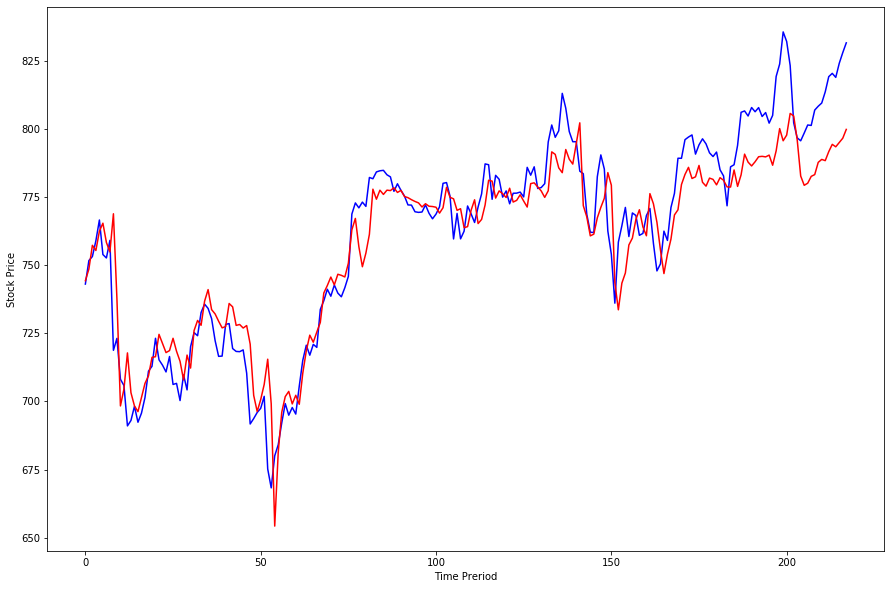

In [126]:
# 단계 6: 모델 평가
print(model3.evaluate(testX,testY))
pred=model3.predict(testX)
# 표준화된 값을 원래 단위로 다시 변환
testY1=(testY*(max1[-1]-min1[-1])) + min1[-1]
pred1=(pred*(max1[-1]-min1[-1])) + min1[-1]
# 단계7: 시각화
plt.figure(figsize=(15,10))
plt.plot(testY1, c="blue")
plt.plot(pred1, c="red")
plt.xlabel("Time Preriod")
plt.ylabel("Stock Price")
plt.show()

## 결론
다시 원단위로 바꿨더니 후반부에 차이가 벌어짐. 최적화된 방법을 추가로 찾을 필요가 있음

# 실제 데이터 활용 : 강수량 공공 데이터
## - 강수량 예측하기
### rmsprop은 변동이 심할때 효과적

In [234]:
# Define train parameters 
seq_length = 14 # 매번 14개의 과거 정보를 활용할 것임
data_dim = 6 # 특성 5개
hidden_dim = 10 # 노드의 개수
output_dim = 1 # 결과는 마지막에 하나만 나옴
learning_rate =0.01
iterations = 80 # 에폭 횟수

#xy1 = np.genfromtxt('../20190722174407.csv', delimiter=',',skip_header=1, filling_values=0,
#                    usecols=(2,3,4,5,6,7,8,9) ) # 넘파이 구조로 불러오기
xy1 = np.genfromtxt('./20190722174407.csv', delimiter=',',skip_header=1,
                    usecols=(2,3,4,5,6,7,8,9) ) # 넘파이 구조로 불러오기
# 결측행 제거
xy1= xy1[~np.isnan(xy1).any(axis=1)]

# 강수량을 마지막 열로 옮기기
permutation = [0,7,2,3,4,5,6,1]
i = np.argsort(permutation)
xy1=xy1[:,i]
print(np.max(xy1, 0))

# 단계 3: 정규화
min1 = np.min(xy1, 0) # 각 열마다 최소값 
max1 = np.max(xy1, 0) # 각 열마다 최대값 
xy = (xy1-min1)/(max1-min1) # 정규화: (X-min) / (max - min)

print(xy[0])

len(xy[6])

[  31.7   35.9    7.5   25.3 1023.    29.2   10.   301.5]
[0.84259259 0.74109264 0.14705882 0.95435685 0.20952381 0.05894448
 1.         0.19237148]


8

In [235]:
x=xy
# x,y 분리
y0 = xy[:,-1] # 한 열에 모든 데이터 행
y = xy[:, [-1]] # 열방향으로 전환 # close as label
dataX=[]
dataY=[]
for i in range(0, len(y)-seq_length): # i번째 시계열 값~i-7까지
    _x = x[i:i + seq_length] # 14개 행을 불러옴
    _y = y[i + seq_length] # 다음 종가(7일 후 값) 하나만 가져옴
    print(_x, "->",_y)
    dataX.append(_x)
    dataY.append(_y)
dataX[0]

[[8.42592593e-01 7.41092637e-01 1.47058824e-01 9.54356846e-01
  2.09523810e-01 5.89444825e-02 1.00000000e+00 1.92371476e-01]
 [8.24074074e-01 7.45843230e-01 1.02941176e-01 9.29460581e-01
  1.80952381e-01 1.44276902e-01 9.50000000e-01 1.82421227e-02]
 [8.37962963e-01 8.76484561e-01 1.76470588e-01 8.31950207e-01
  4.23809524e-01 5.53803975e-01 7.50000000e-01 3.31674959e-04]
 [8.42592593e-01 8.36104513e-01 2.35294118e-01 8.31950207e-01
  3.97619048e-01 6.68265936e-01 4.10000000e-01 1.65837479e-03]
 [8.58796296e-01 8.26603325e-01 1.17647059e-01 8.50622407e-01
  4.04761905e-01 4.73612063e-01 6.40000000e-01 0.00000000e+00]
 [8.17129630e-01 7.83847981e-01 2.79411765e-01 8.34024896e-01
  2.92857143e-01 4.16038382e-01 7.90000000e-01 1.65837479e-03]
 [8.70370370e-01 8.76484561e-01 1.91176471e-01 8.71369295e-01
  4.07142857e-01 6.76148047e-01 4.40000000e-01 4.97512438e-03]
 [8.40277778e-01 7.55344418e-01 1.76470588e-01 8.83817427e-01
  4.38095238e-01 3.87251542e-01 6.30000000e-01 3.31674959e-03]


  4.07142857e-01 7.17957505e-01 4.00000000e-01 0.00000000e+00]] -> [0.013267]
[[4.25925926e-01 3.65795724e-01 2.35294118e-01 4.83402490e-01
  5.50000000e-01 3.92392049e-01 8.80000000e-01 1.65837479e-02]
 [3.33333333e-01 2.92161520e-01 3.38235294e-01 3.75518672e-01
  7.14285714e-01 4.54420836e-01 5.50000000e-01 1.92371476e-02]
 [3.84259259e-01 3.44418052e-01 3.38235294e-01 3.92116183e-01
  7.92857143e-01 5.05825908e-01 7.00000000e-01 0.00000000e+00]
 [3.86574074e-01 3.25415677e-01 3.23529412e-01 4.62655602e-01
  7.73809524e-01 4.17751885e-01 6.90000000e-01 4.97512438e-03]
 [4.88425926e-01 3.91923990e-01 1.61764706e-01 6.39004149e-01
  6.21428571e-01 9.73269363e-02 1.00000000e+00 2.32172471e-02]
 [5.16203704e-01 4.37054632e-01 4.11764706e-01 5.00000000e-01
  6.00000000e-01 4.66758053e-01 7.10000000e-01 4.97512438e-03]
 [5.48611111e-01 5.24940618e-01 4.11764706e-01 6.43153527e-01
  3.69047619e-01 3.94448252e-01 7.50000000e-01 3.31674959e-04]
 [4.21296296e-01 3.30166271e-01 4.41176471e-01 

  7.78571429e-01 1.47018506e-01 8.90000000e-01 3.31674959e-03]] -> [0.00033167]
[[7.56944444e-01 6.91211401e-01 3.08823529e-01 8.25726141e-01
  6.16666667e-01 1.77518849e-01 9.40000000e-01 0.00000000e+00]
 [8.05555556e-01 7.55344418e-01 1.32352941e-01 8.31950207e-01
  5.92857143e-01 4.08156271e-01 8.90000000e-01 0.00000000e+00]
 [8.63425926e-01 8.31353919e-01 2.35294118e-01 8.60995851e-01
  3.92857143e-01 4.31117204e-01 7.30000000e-01 0.00000000e+00]
 [7.52314815e-01 7.38717340e-01 4.70588235e-01 7.51037344e-01
  5.14285714e-01 5.06168609e-01 8.00000000e-01 1.65837479e-03]
 [6.55092593e-01 5.98574822e-01 5.14705882e-01 6.39004149e-01
  6.16666667e-01 2.08704592e-01 7.80000000e-01 3.31674959e-04]
 [6.57407407e-01 5.72446556e-01 2.50000000e-01 7.63485477e-01
  5.16666667e-01 9.69842358e-02 8.80000000e-01 7.46268657e-02]
 [5.99537037e-01 4.91686461e-01 1.76470588e-01 6.97095436e-01
  5.04761905e-01 6.68265936e-02 8.60000000e-01 1.65837479e-02]
 [5.67129630e-01 4.63182898e-01 1.76470588e-0

  2.64285714e-01 2.72104181e-01 8.90000000e-01 2.15588723e-02]] -> [0.026534]
[[7.50000000e-01 7.50593824e-01 2.94117647e-01 7.24066390e-01
  6.19047619e-01 6.20973269e-01 3.80000000e-01 6.63349917e-04]
 [7.87037037e-01 8.40855107e-01 4.11764706e-01 7.80082988e-01
  3.95238095e-01 6.18231666e-01 6.00000000e-01 0.00000000e+00]
 [7.80092593e-01 7.52969121e-01 2.05882353e-01 7.94605809e-01
  2.59523810e-01 3.87251542e-01 8.40000000e-01 6.63349917e-03]
 [7.89351852e-01 7.62470309e-01 2.79411765e-01 7.59336100e-01
  2.35714286e-01 5.00000000e-01 5.90000000e-01 1.32669983e-03]
 [8.28703704e-01 8.74109264e-01 2.94117647e-01 8.07053942e-01
  4.30952381e-01 5.15078821e-01 5.10000000e-01 0.00000000e+00]
 [8.65740741e-01 8.90736342e-01 2.35294118e-01 8.27800830e-01
  4.09523810e-01 4.66072653e-01 8.90000000e-01 6.63349917e-02]
 [7.73148148e-01 7.03087886e-01 5.14705882e-01 8.83817427e-01
  2.50000000e-01 1.08978753e-01 1.00000000e+00 2.30514096e-01]
 [7.66203704e-01 6.76959620e-01 3.38235294e-01 

  8.61904762e-01 3.05346127e-01 2.40000000e-01 0.00000000e+00]] -> [0.00331675]
[[3.44907407e-01 2.04275534e-01 1.32352941e-01 3.73443983e-01
  6.88095238e-01 2.15558602e-01 7.60000000e-01 1.65837479e-03]
 [3.19444444e-01 2.28028504e-01 4.55882353e-01 3.21576763e-01
  5.78571429e-01 3.14599040e-01 3.80000000e-01 3.31674959e-03]
 [3.81944444e-01 2.47030879e-01 4.55882353e-01 4.00414938e-01
  5.83333333e-01 1.31254284e-01 5.30000000e-01 3.31674959e-03]
 [3.05555556e-01 1.68646081e-01 2.64705882e-01 3.02904564e-01
  7.85714286e-01 2.35777930e-01 5.50000000e-01 1.65837479e-03]
 [3.05555556e-01 1.61520190e-01 4.55882353e-01 3.92116183e-01
  5.40476190e-01 2.19328307e-02 8.60000000e-01 1.79104478e-02]
 [1.78240741e-01 1.09263658e-01 3.67647059e-01 2.80082988e-01
  5.78571429e-01 6.75119945e-02 6.40000000e-01 1.92371476e-02]
 [1.20370370e-01 1.33016627e-01 2.64705882e-01 1.65975104e-01
  7.61904762e-01 2.82042495e-01 3.80000000e-01 3.31674959e-04]
 [1.62037037e-01 1.37767221e-01 5.00000000e-0

  2.90476190e-01 3.46470185e-01 7.00000000e-01 2.32172471e-02]] -> [0.14925373]
[[8.77314815e-01 7.76722090e-01 3.52941176e-01 9.46058091e-01
  4.02380952e-01 1.78204249e-01 9.90000000e-01 2.80265340e-01]
 [8.61111111e-01 7.48218527e-01 4.55882353e-01 9.58506224e-01
  3.07142857e-01 4.14667581e-02 1.00000000e+00 1.87396352e-01]
 [8.37962963e-01 7.57719715e-01 5.73529412e-01 9.02489627e-01
  2.21428571e-01 3.29677862e-01 7.80000000e-01 3.81426202e-02]
 [8.68055556e-01 7.88598575e-01 4.41176471e-01 8.94190871e-01
  2.54761905e-01 6.39479095e-01 6.80000000e-01 0.00000000e+00]
 [8.72685185e-01 8.31353919e-01 2.20588235e-01 8.79668050e-01
  3.38095238e-01 5.49006169e-01 6.90000000e-01 6.63349917e-04]
 [8.51851852e-01 7.38717340e-01 2.05882353e-01 9.43983402e-01
  2.95238095e-01 4.83207676e-02 1.00000000e+00 3.64842454e-02]
 [8.79629630e-01 8.00475059e-01 3.97058824e-01 9.52282158e-01
  2.52380952e-01 4.07470870e-01 6.40000000e-01 1.16086235e-02]
 [8.75000000e-01 7.88598575e-01 2.20588235e-0

  0.98       0.01426202]] -> [0.00066335]
[[2.77777778e-01 1.78147268e-01 3.82352941e-01 3.13278008e-01
  7.11904762e-01 1.90884167e-01 7.40000000e-01 0.00000000e+00]
 [1.57407407e-01 7.36342043e-02 1.91176471e-01 1.80497925e-01
  9.42857143e-01 2.36120631e-01 3.10000000e-01 0.00000000e+00]
 [2.10648148e-01 9.97624703e-02 3.97058824e-01 1.88796680e-01
  8.71428571e-01 2.41946539e-01 2.50000000e-01 0.00000000e+00]
 [2.06018519e-01 8.31353919e-02 1.76470588e-01 1.97095436e-01
  8.73809524e-01 2.84784099e-01 4.90000000e-01 0.00000000e+00]
 [2.31481481e-01 1.42517815e-01 3.67647059e-01 3.94190871e-01
  6.57142857e-01 8.67032214e-02 9.60000000e-01 1.75787728e-02]
 [1.38888889e-01 1.35391924e-01 2.50000000e-01 2.38589212e-01
  7.97619048e-01 1.83687457e-01 5.30000000e-01 2.32172471e-03]
 [3.63425926e-01 1.85273159e-01 2.50000000e-01 4.73029046e-01
  6.00000000e-01 4.83207676e-02 7.00000000e-01 9.95024876e-03]
 [3.00925926e-01 1.75771971e-01 3.23529412e-01 2.96680498e-01
  7.80952381e-01 3.67

  4.45238095e-01 8.53324195e-02 8.60000000e-01 2.98507463e-02]] -> [0.00829187]
[[8.65740741e-01 7.74346793e-01 3.38235294e-01 8.94190871e-01
  3.90476190e-01 2.88211103e-01 9.30000000e-01 0.00000000e+00]
 [8.54166667e-01 8.24228029e-01 2.64705882e-01 8.79668050e-01
  4.80952381e-01 3.89307745e-01 6.30000000e-01 3.81426202e-02]
 [8.49537037e-01 8.05225653e-01 1.61764706e-01 8.75518672e-01
  5.76190476e-01 4.86291981e-01 4.50000000e-01 2.15588723e-02]
 [8.24074074e-01 7.50593824e-01 1.17647059e-01 8.60995851e-01
  5.45238095e-01 4.65387252e-01 6.10000000e-01 4.97512438e-03]
 [8.00925926e-01 7.24465558e-01 2.64705882e-01 8.46473029e-01
  4.97619048e-01 3.64976011e-01 8.50000000e-01 1.99004975e-02]
 [7.08333333e-01 6.36579572e-01 3.97058824e-01 8.69294606e-01
  2.88095238e-01 8.73886223e-02 9.80000000e-01 1.90713101e-01]
 [7.59259259e-01 7.07838480e-01 2.05882353e-01 8.15352697e-01
  5.38095238e-01 3.18368746e-01 6.90000000e-01 3.31674959e-04]
 [7.33796296e-01 6.62707838e-01 1.02941176e-0

  0.54       0.03150912]] -> [0.00995025]
[[0.74537037 0.71021378 0.20588235 0.75103734 0.49285714 0.52159013
  0.71       0.00165837]
 [0.68981481 0.6152019  0.20588235 0.81950207 0.38571429 0.17957505
  0.89       0.01160862]
 [0.69212963 0.70071259 0.33823529 0.68879668 0.43333333 0.45647704
  0.8        0.04643449]
 [0.57407407 0.54394299 0.83823529 0.65767635 0.2047619  0.43694311
  0.74       0.03150912]
 [0.66898148 0.60570071 0.67647059 0.65352697 0.3        0.79986292
  0.18       0.        ]
 [0.6087963  0.54394299 0.42647059 0.74273859 0.35714286 0.11274846
  0.94       0.00331675]
 [0.72453704 0.65320665 0.32352941 0.76970954 0.34047619 0.31459904
  0.61       0.0013267 ]
 [0.70833333 0.6128266  0.14705882 0.69087137 0.37619048 0.20287868
  0.93       0.00331675]
 [0.83564815 0.80997625 0.30882353 0.78838174 0.25952381 0.39444825
  0.73       0.02487562]
 [0.8125     0.80047506 0.45588235 0.79045643 0.29285714 0.77039068
  0.58       0.00165837]
 [0.83796296 0.78384798 0.36

  8.40476190e-01 2.22069911e-01 6.10000000e-01 9.95024876e-04]] -> [0.00033167]
[[3.75000000e-01 2.87410926e-01 3.08823529e-01 4.62655602e-01
  6.42857143e-01 1.58670322e-01 8.00000000e-01 3.31674959e-04]
 [1.89814815e-01 1.33016627e-01 2.20588235e-01 2.75933610e-01
  9.73809524e-01 5.62028787e-02 6.30000000e-01 0.00000000e+00]
 [3.17129630e-01 1.94774347e-01 2.64705882e-01 4.35684647e-01
  8.33333333e-01 1.05894448e-01 5.80000000e-01 6.63349917e-03]
 [4.02777778e-01 2.63657957e-01 2.05882353e-01 4.39834025e-01
  7.28571429e-01 2.34749829e-01 4.50000000e-01 1.32669983e-03]
 [2.47685185e-01 1.68646081e-01 1.91176471e-01 2.28215768e-01
  7.02380952e-01 3.26593557e-01 2.30000000e-01 0.00000000e+00]
 [2.87037037e-01 1.92399050e-01 2.50000000e-01 4.02489627e-01
  6.85714286e-01 1.52844414e-01 4.50000000e-01 2.32172471e-03]
 [2.73148148e-01 1.40142518e-01 2.64705882e-01 3.58921162e-01
  8.83333333e-01 1.85400960e-01 6.90000000e-01 8.29187396e-03]
 [1.62037037e-01 1.04513064e-01 1.91176471e-0

  3.66666667e-01 3.45442084e-01 5.10000000e-01 2.65339967e-02]] -> [0.]
[[9.14351852e-01 9.04988124e-01 3.08823529e-01 9.31535270e-01
  3.59523810e-01 6.10006854e-01 6.30000000e-01 6.63349917e-04]
 [8.75000000e-01 7.79097387e-01 1.32352941e-01 9.48132780e-01
  4.28571429e-01 1.81973955e-01 9.60000000e-01 1.97346600e-01]
 [9.28240741e-01 8.50356295e-01 2.05882353e-01 9.52282158e-01
  4.78571429e-01 5.22618232e-01 5.90000000e-01 1.65837479e-03]
 [9.35185185e-01 8.71733967e-01 1.32352941e-01 9.54356846e-01
  4.88095238e-01 5.58944483e-01 5.40000000e-01 6.63349917e-04]
 [8.95833333e-01 8.66983373e-01 7.35294118e-02 9.23236515e-01
  4.35714286e-01 3.08773132e-01 7.60000000e-01 6.63349917e-03]
 [9.44444444e-01 9.26365796e-01 1.76470588e-01 9.43983402e-01
  4.14285714e-01 4.25976696e-01 3.80000000e-01 3.31674959e-03]
 [9.35185185e-01 9.35866983e-01 1.76470588e-01 9.66804979e-01
  3.28571429e-01 3.89307745e-01 5.30000000e-01 6.63349917e-04]
 [9.39814815e-01 1.00000000e+00 1.76470588e-01 9.1908

  5.95238095e-01 6.00411241e-01 1.00000000e-01 0.00000000e+00]] -> [0.]
[[2.06018519e-01 1.61520190e-01 3.97058824e-01 2.11618257e-01
  8.45238095e-01 3.87251542e-01 1.60000000e-01 9.95024876e-03]
 [2.84722222e-01 1.49643705e-01 1.61764706e-01 3.75518672e-01
  6.50000000e-01 6.57984921e-02 9.60000000e-01 1.49253731e-02]
 [1.55092593e-01 1.49643705e-01 3.82352941e-01 2.40663900e-01
  7.95238095e-01 3.93077450e-01 2.90000000e-01 3.31674959e-04]
 [2.93981481e-01 1.63895487e-01 2.05882353e-01 4.17012448e-01
  5.23809524e-01 8.29335161e-02 7.30000000e-01 1.65837479e-03]
 [3.93518519e-01 2.13776722e-01 1.91176471e-01 4.52282158e-01
  6.66666667e-01 1.73406443e-01 5.80000000e-01 0.00000000e+00]
 [2.84722222e-01 2.63657957e-01 4.70588235e-01 3.19502075e-01
  7.09523810e-01 4.92460589e-01 3.10000000e-01 1.32669983e-02]
 [3.19444444e-01 1.54394299e-01 1.76470588e-01 4.02489627e-01
  5.66666667e-01 1.74777245e-01 7.00000000e-01 3.31674959e-03]
 [2.31481481e-01 2.04275534e-01 5.14705882e-01 2.5933

  6.85714286e-01 2.46401645e-01 3.90000000e-01 0.00000000e+00]] -> [0.02487562]
[[7.91666667e-01 7.17339667e-01 1.47058824e-01 8.07053942e-01
  3.97619048e-01 0.00000000e+00 8.80000000e-01 1.65837479e-03]
 [6.87500000e-01 5.93824228e-01 2.35294118e-01 7.53112033e-01
  6.14285714e-01 1.04180946e-01 8.90000000e-01 1.32669983e-02]
 [7.75462963e-01 6.62707838e-01 2.35294118e-01 7.57261411e-01
  4.83333333e-01 3.83139136e-01 2.60000000e-01 4.97512438e-03]
 [7.03703704e-01 6.08076010e-01 2.35294118e-01 7.28215768e-01
  6.64285714e-01 1.81631254e-01 8.50000000e-01 1.65837479e-03]
 [7.73148148e-01 7.14964371e-01 7.35294118e-02 7.90456432e-01
  6.83333333e-01 3.13570939e-01 7.50000000e-01 0.00000000e+00]
 [7.87037037e-01 7.38717340e-01 1.17647059e-01 7.94605809e-01
  7.23809524e-01 2.47429746e-01 6.50000000e-01 0.00000000e+00]
 [7.61574074e-01 6.72209026e-01 8.82352941e-02 8.27800830e-01
  6.47619048e-01 1.27827279e-01 9.30000000e-01 1.32669983e-03]
 [6.25000000e-01 5.60570071e-01 3.23529412e-0

  5.69047619e-01 1.36394791e-01 9.90000000e-01 4.64344942e-02]] -> [0.05472637]
[[7.75462963e-01 7.48218527e-01 1.17647059e-01 7.80082988e-01
  3.61904762e-01 5.39067855e-01 7.40000000e-01 0.00000000e+00]
 [7.66203704e-01 6.86460808e-01 5.88235294e-02 8.19502075e-01
  3.97619048e-01 3.53666895e-01 9.50000000e-01 9.61857380e-02]
 [7.68518519e-01 7.17339667e-01 1.02941176e-01 7.46887967e-01
  4.76190476e-01 8.09458533e-01 6.10000000e-01 5.47263682e-02]
 [7.82407407e-01 6.81710214e-01 2.50000000e-01 8.87966805e-01
  3.02380952e-01 4.35229609e-02 1.00000000e+00 2.37147595e-01]
 [7.82407407e-01 7.10213777e-01 1.91176471e-01 8.67219917e-01
  2.69047619e-01 4.64016450e-01 8.80000000e-01 3.31674959e-03]
 [8.05555556e-01 7.29216152e-01 5.88235294e-02 9.00414938e-01
  2.04761905e-01 3.18368746e-01 9.50000000e-01 8.78938640e-02]
 [8.37962963e-01 7.79097387e-01 1.17647059e-01 8.98340249e-01
  2.88095238e-01 6.43248801e-01 7.30000000e-01 2.15588723e-02]
 [8.31018519e-01 7.33966746e-01 2.94117647e-0

  0.5        0.01359867]] -> [0.03747927]
[[0.34259259 0.24465558 0.25       0.32365145 0.7        0.4318026
  0.3        0.00563847]
 [0.38657407 0.3111639  0.32352941 0.47925311 0.50238095 0.23098012
  0.94       0.00597015]
 [0.36805556 0.27315914 0.36764706 0.32780083 0.65952381 0.28101439
  0.51       0.        ]
 [0.53009259 0.48456057 0.32352941 0.39004149 0.43809524 0.68848526
  0.3        0.        ]
 [0.48148148 0.35866983 0.05882353 0.38174274 0.49285714 0.15284441
  0.85       0.0026534 ]
 [0.47916667 0.39192399 0.25       0.40456432 0.58571429 0.19259767
  0.94       0.05771144]
 [0.43055556 0.35154394 0.16176471 0.54771784 0.50952381 0.23851953
  0.83       0.0185738 ]
 [0.48842593 0.37292162 0.22058824 0.41493776 0.56666667 0.2854695
  0.6        0.00563847]
 [0.55787037 0.44418052 0.19117647 0.63900415 0.4952381  0.20082248
  0.63       0.        ]
 [0.59722222 0.56294537 0.17647059 0.63692946 0.56428571 0.5006854
  0.71       0.0039801 ]
 [0.6087963  0.57719715 0.17647

array([[8.42592593e-01, 7.41092637e-01, 1.47058824e-01, 9.54356846e-01,
        2.09523810e-01, 5.89444825e-02, 1.00000000e+00, 1.92371476e-01],
       [8.24074074e-01, 7.45843230e-01, 1.02941176e-01, 9.29460581e-01,
        1.80952381e-01, 1.44276902e-01, 9.50000000e-01, 1.82421227e-02],
       [8.37962963e-01, 8.76484561e-01, 1.76470588e-01, 8.31950207e-01,
        4.23809524e-01, 5.53803975e-01, 7.50000000e-01, 3.31674959e-04],
       [8.42592593e-01, 8.36104513e-01, 2.35294118e-01, 8.31950207e-01,
        3.97619048e-01, 6.68265936e-01, 4.10000000e-01, 1.65837479e-03],
       [8.58796296e-01, 8.26603325e-01, 1.17647059e-01, 8.50622407e-01,
        4.04761905e-01, 4.73612063e-01, 6.40000000e-01, 0.00000000e+00],
       [8.17129630e-01, 7.83847981e-01, 2.79411765e-01, 8.34024896e-01,
        2.92857143e-01, 4.16038382e-01, 7.90000000e-01, 1.65837479e-03],
       [8.70370370e-01, 8.76484561e-01, 1.91176471e-01, 8.71369295e-01,
        4.07142857e-01, 6.76148047e-01, 4.40000000e-01, 4.

In [236]:
# 단계5: 훈련/테스트셋 분리
train_size = int(len(dataY)*0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)]) # 시계열이므로 순서대로 분리.
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

In [237]:
# 단계2 : 모델 설계
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.LSTM(10,input_shape=(14,8),
                               return_sequences=True)) # 전체 인스턴스의 수는 알아서 맞춰짐
model3.add(tf.keras.layers.LSTM(20))
model3.add(tf.keras.layers.Dense(1)) # 회귀분석이므로 노드 1

optimizer = tf.train.RMSPropOptimizer(learning_rate)
model3.compile(loss='mean_squared_error',
              optimizer = optimizer,
              metrics = ['mean_absolute_error', 'mean_squared_error','acc'])
model3.fit(trainX, trainY, epochs = iterations, )
# 단계 6: 모델 평가
model3.evaluate(testX,testY)

Epoch 1/80
878/878 [==============================] - 3s 4ms/sample - loss: 0.0070 - mean_absolute_error: 0.0416 - mean_squared_error: 0.0070 - acc: 0.2141
Epoch 2/80
878/878 [==============================] - 2s 2ms/sample - loss: 0.0069 - mean_absolute_error: 0.0437 - mean_squared_error: 0.0069 - acc: 0.2141
Epoch 3/80
878/878 [==============================] - 2s 2ms/sample - loss: 0.0094 - mean_absolute_error: 0.0644 - mean_squared_error: 0.0094 - acc: 0.2141
Epoch 4/80
878/878 [==============================] - 2s 2ms/sample - loss: 0.0083 - mean_absolute_error: 0.0582 - mean_squared_error: 0.0083 - acc: 0.2141
Epoch 5/80
878/878 [==============================] - 2s 2ms/sample - loss: 0.0067 - mean_absolute_error: 0.0481 - mean_squared_error: 0.0067 - acc: 0.2141
Epoch 6/80
878/878 [==============================] - 2s 2ms/sample - loss: 0.0064 - mean_absolute_error: 0.0426 - mean_squared_error: 0.0064 - acc: 0.2141
Epoch 7/80
878/878 [==============================] - 2s 2ms/sam

Epoch 53/80
878/878 [==============================] - 2s 2ms/sample - loss: 0.0054 - mean_absolute_error: 0.0379 - mean_squared_error: 0.0054 - acc: 0.2141
Epoch 54/80
878/878 [==============================] - 2s 2ms/sample - loss: 0.0053 - mean_absolute_error: 0.0374 - mean_squared_error: 0.0053 - acc: 0.2141
Epoch 55/80
878/878 [==============================] - 2s 2ms/sample - loss: 0.0054 - mean_absolute_error: 0.0385 - mean_squared_error: 0.0054 - acc: 0.2141
Epoch 56/80
878/878 [==============================] - 2s 3ms/sample - loss: 0.0053 - mean_absolute_error: 0.0382 - mean_squared_error: 0.0053 - acc: 0.2141
Epoch 57/80
878/878 [==============================] - 2s 2ms/sample - loss: 0.0053 - mean_absolute_error: 0.0383 - mean_squared_error: 0.0053 - acc: 0.2141
Epoch 58/80
878/878 [==============================] - 2s 2ms/sample - loss: 0.0049 - mean_absolute_error: 0.0371 - mean_squared_error: 0.0049 - acc: 0.2141
Epoch 59/80
878/878 [==============================] - 2s 

[0.005102622722935139, 0.042226437, 0.0051026233, 0.27055702]

377/377 [==============================] - 0s 1ms/sample - loss: 0.0051 - mean_absolute_error: 0.0422 - mean_squared_error: 0.0051 - acc: 0.2706
[0.005102622722935139, 0.042226437, 0.0051026233, 0.27055702]


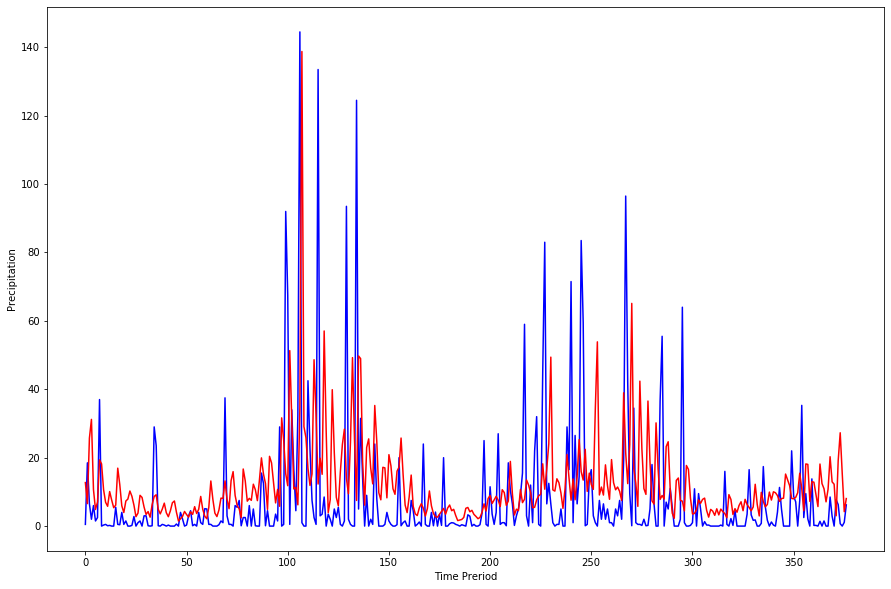

In [238]:
# 단계 6: 모델 평가
print(model3.evaluate(testX,testY))
pred=model3.predict(testX)
# 표준화된 값을 원래 단위로 다시 변환
testY1=(testY*(max1[-1]-min1[-1])) + min1[-1]
pred1=(pred*(max1[-1]-min1[-1])) + min1[-1]
# 단계7: 시각화
plt.figure(figsize=(15,10))
plt.plot(testY1, c="blue")
plt.plot(pred1, c="red")
plt.xlabel("Time Preriod")
plt.ylabel("Precipitation")
plt.show()